# CUSTOMER CHURN CLASSIFIER

---

![](https://images.unsplash.com/photo-1521791136064-7986c2920216?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Cytonn Photography](https://unsplash.com/@cytonn_photography)

# Context 

The project is about a telecom company 🛰 : they want to **predict if a customer is about to leave**. I will combine both unsupervised and supervised approaches in order to build a **customer churn classifier**.

# Content

The dataset contains about **7000 customers** with **19 features**.

**Features** :
- customerID : a unique ID for each customer
- gender: the gender of the customer
- SeniorCitizen: whether the customer is a senior (i.e. older than 65) or not
- Partner: whether the customer has a partner or not
- Dependents: whether the customer has people to take care of or not
- tenure: the number of months the customer has stayed
- PhoneService: whether the customer has a phone service or not
- MultipleLines: whether the customer has multiple telephonic lines or not
- InternetService: the kind of internet services the customer has (DSL, Fiber optic, no)
- OnlineSecurity: what online security the customer has (Yes, No, No internet service)
- OnlineBackup: whether the customer has online backup file system (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: whether the customer has a streaming TV device (e.g. a TV box) or not (Yes, No, No internet service)
- StreamingMovies: whether the customer uses streaming movies (e.g. VOD) or not (Yes, No, No internet service)
- Contract: the contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has electronic billing or not (Yes, No)
- PaymentMethod: payment method of the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: the amount charged to the customer monthly
- TotalCharges: the total amount the customer paid

**Target** :
- Churn: whether the customer left or not (Yes, No)

Many features are **categorical** data with more than 2 values => need to handle it.

# Sections

1. **EDA and Data preparation** (loading and cleaning, dummies, scalling, concatenation)
2. **Feature engineering** (PCA, split)
3. **Market segmentation** : different clusterings models are used to determine meaningful clusters of customers and I try to label them according to their main characteristics.(Logistic regression, SVM, Random Forest, Gradient Boosting, xGB/ Hyperparameter optimization/ SMOTE)
4. **Churn prediction** : the best prediction model according to the F1-score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. EDA and Data preparation

## Loading and cleaning

In [2]:
df = pd.read_csv("src/Telco-Customer-Churn.csv", na_values=' ')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [4]:
df.shape

(7043, 21)

In [5]:
pd.isna(df).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df = df.fillna(0)
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [9]:
for col in df.select_dtypes('object'):
    print (f'{col:-<50} {df[col].unique()}')

customerID---------------------------------------- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender-------------------------------------------- ['Female' 'Male']
Partner------------------------------------------- ['Yes' 'No']
Dependents---------------------------------------- ['No' 'Yes']
PhoneService-------------------------------------- ['No' 'Yes']
MultipleLines------------------------------------- ['No phone service' 'No' 'Yes']
InternetService----------------------------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity------------------------------------ ['No' 'Yes' 'No internet service']
OnlineBackup-------------------------------------- ['Yes' 'No' 'No internet service']
DeviceProtection---------------------------------- ['No' 'Yes' 'No internet service']
TechSupport--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingTV--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingMov

In [10]:
df.duplicated().sum()

0

# Data exploration

In [11]:
print('Proportion of non churners:', round(len(df[df.Churn=='No'])/len(df),2), '%')

Proportion of non churners: 0.73 %


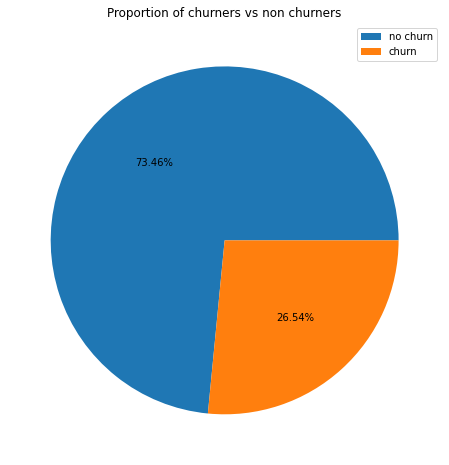

In [12]:
plt.figure(figsize=(8,8))
plt.pie([len(df[df.Churn=="No"]), len(df[df.Churn=="Yes"])], autopct='%1.2f%%')
plt.legend(['no churn', 'churn'])
plt.title('Proportion of churners vs non churners')
plt.show()

There are about 3 times more non churners than churners.

[]

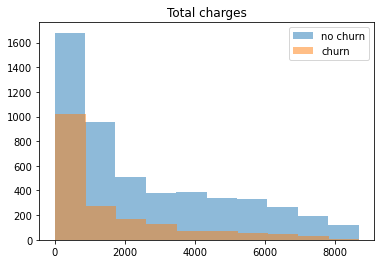

In [13]:
plt.hist(df[df['Churn']=="No"]['TotalCharges'], alpha = 0.5)
plt.hist(df[df['Churn']=="Yes"]['TotalCharges'], alpha = 0.5)
plt.title('Total charges')
plt.legend(['no churn', 'churn'])
plt.plot()

[]

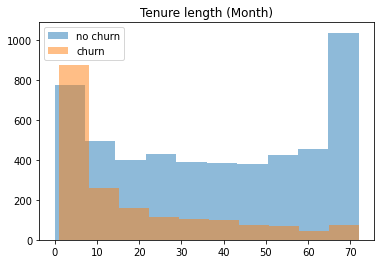

In [14]:
plt.hist(df[df['Churn']=="No"]['tenure'], alpha = 0.5)
plt.hist(df[df['Churn']=="Yes"]['tenure'], alpha = 0.5)
plt.title('Tenure length (Month)')
plt.legend(['no churn', 'churn'])
plt.plot()

[]

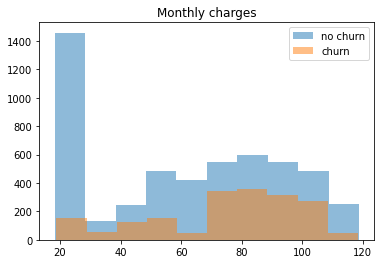

In [15]:
plt.hist(df[df['Churn']=="No"]['MonthlyCharges'], alpha = 0.5)
plt.hist(df[df['Churn']=="Yes"]['MonthlyCharges'], alpha = 0.5)
plt.title('Monthly charges')
plt.legend(['no churn', 'churn'])
plt.plot()

In [16]:
df_nochurn = df[df['Churn']=='No']
df_churn = df[df['Churn']=='Yes']

## Data preparation

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Dummies

In [18]:
to_dummify = df.drop(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis=1)

In [19]:
dummies = pd.get_dummies(to_dummify)
dummies.columns

Index(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_

In [20]:
dummies = dummies.drop(['gender_Male', 'Partner_No', 'Dependents_No', 'PhoneService_Yes', 'PaperlessBilling_No'], axis=1)
dummies.columns, dummies.shape

(Index(['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_No',
        'MultipleLines_No', 'MultipleLines_No phone service',
        'MultipleLines_Yes', 'InternetService_DSL',
        'InternetService_Fiber optic', 'InternetService_No',
        'OnlineSecurity_No', 'OnlineSecurity_No internet service',
        'OnlineSecurity_Yes', 'OnlineBackup_No',
        'OnlineBackup_No internet service', 'OnlineBackup_Yes',
        'DeviceProtection_No', 'DeviceProtection_No internet service',
        'DeviceProtection_Yes', 'TechSupport_No',
        'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
        'StreamingTV_No internet service', 'StreamingTV_Yes',
        'StreamingMovies_No', 'StreamingMovies_No internet service',
        'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
        'Contract_Two year', 'PaperlessBilling_Yes',
        'PaymentMethod_Bank transfer (automatic)',
        'PaymentMethod_Credit card (automatic)',
    

### Scalling

In [21]:
to_scale = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
to_scale.head()

tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65

In [22]:
to_scale = (to_scale - to_scale.mean(axis=0))/(to_scale.std(axis=0))
to_scale.describe()

tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.118614e-17   -6.406285e-17 -3.758017e-17
std    1.000000e+00    1.000000e+00  1.000000e+00
min   -1.318071e+00   -1.545750e+00 -1.005708e+00
25%   -9.516141e-01   -9.724708e-01 -8.298875e-01
50%   -1.372647e-01    1.857195e-01 -3.905005e-01
75%    9.213896e-01    8.337743e-01  6.647562e-01
max    1.613587e+00    1.794225e+00  2.825605e+00

### Concatenation

In [23]:
X = pd.concat([to_scale, dummies, df['SeniorCitizen']], axis=1)
X.shape

(7043, 40)

In [24]:
X.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  Partner_Yes  \
0 -1.277354       -1.160241     -0.992540              1            1   
1  0.066323       -0.259611     -0.172152              0            0   
2 -1.236636       -0.362635     -0.957998              0            0   
3  0.514215       -0.746482     -0.193659              0            0   
4 -1.236636        0.197351     -0.938808              1            0   

   Dependents_Yes  PhoneService_No  MultipleLines_No  \
0               0                1                 0   
1               0                0                 1   
2               0                0                 1   
3               0                1                 0   
4               0                0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                               1                  0  ...   
1                               0                  0  ...   
2                               0                  0  ...   
3                               1                  0  ...   
4                               0                  0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_Yes  \
0                  0                     1   
1                  0                     0   
2                  0                     1   
3                  0                     0   
4                  0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  SeniorCitizen  
0                           0              0  
1                           1              0  
2                           1              0  
3                           0              0  
4                           0              0  

[5 rows x 40 columns]

In [25]:
y = np.zeros(len(df))
y[df['Churn']=='Yes']=1
y[df['Churn']=='No']=0
y

array([0., 0., 1., ..., 0., 1., 0.])

In [26]:
np.sum(y), len(y), np.sum(y)/len(y)

(1869.0, 7043, 0.2653698707936959)

# 2. Feature engineering

In [27]:
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_No', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Cr

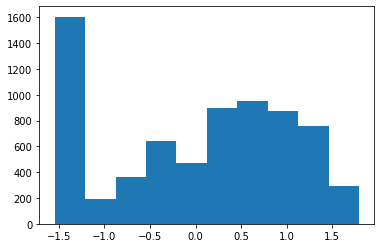

In [28]:
plt.hist(X['MonthlyCharges'])
plt.show()

In [29]:
X['low_tenure'] = X['tenure'] < -0.8
X['high_tenure'] = X['tenure'] > 1.2
X['low_charges'] = X['MonthlyCharges'] < -1.0

In [30]:
X['low_charges'].values

array([ True, False, False, ...,  True, False, False])

In [31]:
X.shape

(7043, 43)

## PCA

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

pca.fit(X)
print("retained variance", np.sum(pca.explained_variance_ratio_))

X_pca = pca.transform(X)

retained variance 0.9905859018003456


In [33]:
pca.components_.shape

(22, 43)

## Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y , test_size=0.2, random_state=0, stratify=y)

# 3. Market segmentation

## Basic Modeling
### Simple Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

def print_metrics(model, X_train, y_train, X_test, y_test):
    print('Train dataset')
    print('-------------')
    print('accuracy', accuracy_score(y_train, model.predict(X_train)))
    print('precision', precision_score(y_train, model.predict(X_train)))
    print('recall', recall_score(y_train, model.predict(X_train)))
    print('F-score', f1_score(y_train, model.predict(X_train)))

    print('-------------')
    print('-------------')

    print('Test dataset')
    print('-------------')
    print('accuracy', accuracy_score(y_test, model.predict(X_test)))
    print('precision', precision_score(y_test, model.predict(X_test)))
    print('recall', recall_score(y_test, model.predict(X_test)))
    print('F-score', f1_score(y_test, model.predict(X_test))) 

In [37]:
print_metrics(lr, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8033368832090877
precision 0.663844199830652
recall 0.5244147157190635
F-score 0.5859491778774291
-------------
-------------
Test dataset
-------------
accuracy 0.8090844570617459
precision 0.6744186046511628
recall 0.5427807486631016
F-score 0.6014814814814814


### Simple SVM

In [38]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

SVC()

In [39]:
print_metrics(svm, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8180688675896344
precision 0.7124773960216998
recall 0.5270903010033445
F-score 0.605920799692426
-------------
-------------
Test dataset
-------------
accuracy 0.7934705464868701
precision 0.6466431095406361
recall 0.4893048128342246
F-score 0.5570776255707762


### Simple Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
print_metrics(rf, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.9973375931842385
precision 0.9939919893190922
recall 0.9959866220735786
F-score 0.994988306047444
-------------
-------------
Test dataset
-------------
accuracy 0.7821149751596878
precision 0.6356275303643725
recall 0.4197860962566845
F-score 0.5056360708534622


### Simple Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [43]:
print_metrics(gb, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8338658146964856
precision 0.7399141630901288
recall 0.5765886287625418
F-score 0.6481203007518797
-------------
-------------
Test dataset
-------------
accuracy 0.8041163946061036
precision 0.6666666666666666
recall 0.5240641711229946
F-score 0.5868263473053892


### Simple xGB

In [44]:
import xgboost as xgb

GBC = xgb.XGBClassifier()

GBC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
print_metrics(GBC, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.9879304224352148
precision 0.9843856076035302
recall 0.9698996655518395
F-score 0.977088948787062
-------------
-------------
Test dataset
-------------
accuracy 0.7735982966643009
precision 0.5985663082437276
recall 0.446524064171123
F-score 0.5114854517611026


## Hyperparameter optimization

### Simple Logistic Regression

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

c_space = np.logspace(-5, 2, 10) 
param_grid = {'C': c_space} 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

clf = RandomizedSearchCV(LogisticRegression(), param_grid, n_iter=500, scoring='f1', n_jobs=-1, cv=5, random_state=1)
clf.fit(X_train, y_train)

/home/mona_lisa/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 10 is smaller than n_iter=500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=500, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
       1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
       1.66810054e+01, 1.00000000e+02])},
                   random_state=1, scoring='f1')

In [47]:
clf.best_estimator_

LogisticRegression(C=0.0774263682681127)

In [48]:
print_metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8045793397231097
precision 0.6675170068027211
recall 0.5250836120401338
F-score 0.5877948333957319
-------------
-------------
Test dataset
-------------
accuracy 0.8090844570617459
precision 0.6732673267326733
recall 0.5454545454545454
F-score 0.6026587887740029


### Random Forest

In [49]:
tuned_parameters = [{'max_depth': [5, 8, 10], 'n_estimators': [100, 500, 750, 1000], 'criterion':['gini', 'entropy'],
                     'class_weight': ['balanced', 'balanced_subsample', None]}]

clf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), tuned_parameters, cv=5, scoring='f1')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample',
                                           None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 8, 10],
                          'n_estimators': [100, 500, 750, 1000]}],
             scoring='f1')

In [50]:
clf.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       n_jobs=-1, random_state=0)

In [51]:
print_metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8361732339368122
precision 0.6427145708582834
recall 0.8615384615384616
F-score 0.7362103458130894
-------------
-------------
Test dataset
-------------
accuracy 0.7814052519517388
precision 0.569327731092437
recall 0.7245989304812834
F-score 0.6376470588235295


### XGB

In [52]:
tuned_parameters = [{'max_depth': [10, 100, 1000], 'n_estimators': [10, 30, 100], 'learning_rate': [0.01, 0.1],
                     'subsample':[1, 0.9, 0.8]}]

clf = GridSearchCV(xgb.XGBClassifier(), tuned_parameters, cv=5, scoring='f1')
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [53]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
print_metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.9416045438409656
precision 0.9464012251148545
recall 0.8267558528428094
F-score 0.8825419493038201
-------------
-------------
Test dataset
-------------
accuracy 0.7828246983676366
precision 0.6205673758865248
recall 0.4679144385026738
F-score 0.5335365853658537


## Adding a SMOTE

In [55]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=25)
X_res, y_res = sm.fit_resample(X_train, y_train)

### Simple Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_res, y_res)

LogisticRegression(max_iter=1000)

In [73]:
print_metrics(lr, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.7550585729499467
precision 0.5256353098528757
recall 0.788628762541806
F-score 0.6308186195826645
-------------
-------------
Test dataset
-------------
accuracy 0.7572746628814763
precision 0.5287769784172662
recall 0.786096256684492
F-score 0.6322580645161291


### Simple SVM

In [58]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_res, y_res)

SVC()

In [59]:
print_metrics(svm, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8084842030528931
precision 0.6100529100529101
recall 0.7712374581939799
F-score 0.6812407680945347
-------------
-------------
Test dataset
-------------
accuracy 0.7814052519517388
precision 0.5714285714285714
recall 0.7058823529411765
F-score 0.6315789473684211


### Simple Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=6)

rf.fit(X_res, y_res)

RandomForestClassifier(max_depth=6)

In [61]:
print_metrics(rf, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.7882499112531062
precision 0.5716318785578748
recall 0.8060200668896321
F-score 0.6688870385789619
-------------
-------------
Test dataset
-------------
accuracy 0.7686302342086586
precision 0.5463320463320464
recall 0.7566844919786097
F-score 0.6345291479820628


### Simple Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_res, y_res)

GradientBoostingClassifier()

In [63]:
print_metrics(gb, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.8091941782037628
precision 0.605
recall 0.8093645484949833
F-score 0.6924177396280401
-------------
-------------
Test dataset
-------------
accuracy 0.7792760823278921
precision 0.5633802816901409
recall 0.7486631016042781
F-score 0.642939150401837


### Simple xGB

In [64]:
import xgboost as xgb

GBC = xgb.XGBClassifier()

GBC.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
print_metrics(GBC, X_train, y_train, X_test, y_test)

Train dataset
-------------
accuracy 0.9765708200212992
precision 0.931056293485136
recall 0.9846153846153847
F-score 0.9570871261378413
-------------
-------------
Test dataset
-------------
accuracy 0.7672107877927609
precision 0.5608465608465608
recall 0.5668449197860963
F-score 0.5638297872340424


In [66]:
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_GBC = GBC.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [67]:
y_pred_tot = np.mean([y_pred_lr, y_pred_svm, y_pred_GBC, y_pred_gb], axis=0)

In [68]:
y_pred_tot[y_pred_tot>0.5] = 1
y_pred_tot[y_pred_tot<=0.5] = 0

In [69]:
np.unique(y_pred_tot)

array([0., 1.])

In [70]:
print('Test dataset')
print('-------------')
print('accuracy', accuracy_score(y_test, y_pred_tot))
print('precision', precision_score(y_test, y_pred_tot))
print('recall', recall_score(y_test, y_pred_tot))
print('F-score', f1_score(y_test, y_pred_tot))

Test dataset
-------------
accuracy 0.7835344215755855
precision 0.5785876993166287
recall 0.679144385026738
F-score 0.6248462484624846


# 4. Churn prediction 

- Best result obtained with SMOTE and Simple Gradient Boosting : F1-score = 0.64
- Possible improvement with optimization of the hyperparameters of the Simple Gradient Boosting